In [191]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from string import Template
import json
import sys 
sys.path.append('..')
# coEgoNetworks
import src.coegonets as cnets
import src.notebook as nb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
STYLE='bmh'
plt.style.use(STYLE)
font = {'family' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
mpl.rc('legend',fontsize=12)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('axes',facecolor="white",labelsize=12)
# mpl.rc('text', usetex=True)
PLOT_WIDTH  = 14
PLOT_HEIGHT = 7

In [202]:
#Read data and filter by target word
DATA_PATH="../DATA/txt/wellness_all"
target_word="#wellness"
secondary_target="#fitness"

T = cnets.read_data(DATA_PATH, filter_all=[target_word,secondary_target])
cooc_normalizer = len(T)
print(cooc_normalizer)


10600


In [203]:

#build matrix
k, v = cnets.build_COOM(T)
C = cnets.getDF(k, v)
C

 > processed 10599\10600 docs | 64258 tokens
 > done


,[COUNTS],#fitness,#wellness,#bodyfat,#beyondh2o,#running,#exercise,#health,#nutrition,#gesundheit,...,#plasticsurgeon,#businesstravel,#traveltip,#businesstrip,#frequentflyer,#domenica,#breathe,#naturelovers,#viral,#prostata
[COUNTS],0,10600,10600,5,2,148,1361,6658,1618,9,...,1,1,1,1,1,1,1,1,1,1
#fitness,10600,0,10600,5,2,148,1361,6658,1618,9,...,1,1,1,1,1,1,1,1,1,1
#wellness,10600,10600,0,5,2,148,1361,6658,1618,9,...,1,1,1,1,1,1,1,1,1,1
#bodyfat,5,5,5,0,2,0,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
#beyondh2o,2,2,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#running,148,148,148,0,0,0,46,108,18,0,...,0,0,0,0,0,0,0,0,0,0
#exercise,1361,1361,1361,2,0,46,0,868,162,0,...,0,0,0,0,0,0,0,0,0,0
#health,6658,6658,6658,2,0,108,868,0,1192,2,...,1,1,1,1,1,0,0,0,1,0
#nutrition,1618,1618,1618,2,0,18,162,1192,0,0,...,0,0,0,0,0,0,0,0,0,0
#gesundheit,9,9,9,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0.98, 'Top 10 Hashtag Frequency')

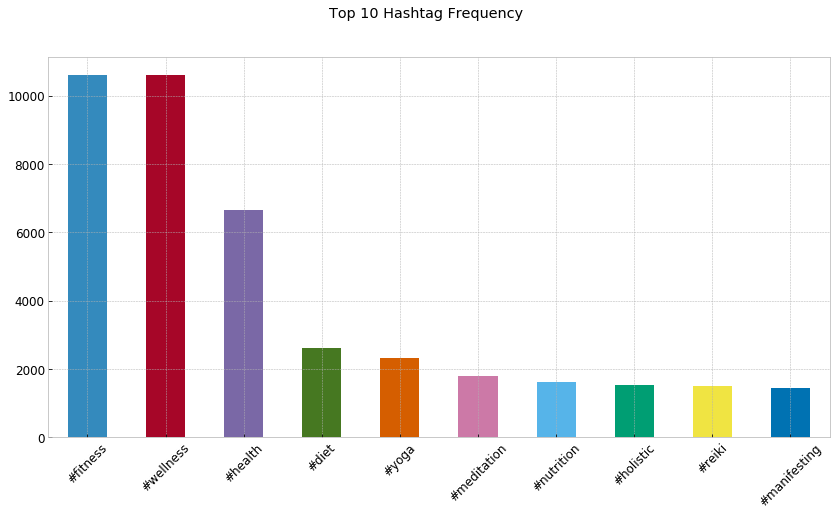

In [204]:
#top K occurrences
K=10
oc = nb.top_k(C, K)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
oc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("Top {} Hashtag Frequency".format(K))

Text(0.5, 0.98, '#wellness: top 10 coocurrences')

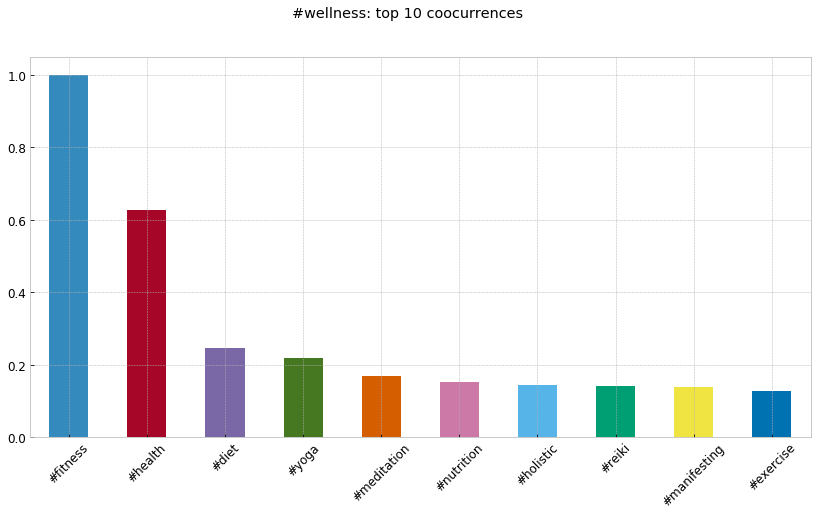

In [205]:
#top K co-occurrences
cooc = nb.top_k_cooc(C,target_word,K, normalizer=cooc_normalizer)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
cooc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("{}: top {} coocurrences".format(target_word, K))

In [206]:
# load javascript for sigma JS 
HTML('''<script src="./js/sigma.min.js"></script>
<script src="./js/sigma.layout.forceAtlas2.min.js"></script>
<script src="./js/sigma.renderers.snapshot.min.js"></script>
<script src="./js/sigma.exporters.svg.min.js"></script>
<script src="./js/sigma.renderers.parallelEdges.min.js"></script>
<script src="./js/sigma.plugins.dragNodes.min.js"></script>
<script src="./js/sigma.plugins.filter.min.js"></script>
<script src="./js/sigma.renderers.edgeLabels.min"></script>''')

In [209]:
#plot top co-occurrences
top_words = list(cooc.keys())
graph = nb.graph(C, top_words, target_word, top_k_edges=10, style=STYLE)
g = nb.sigmaJSGraph(graph) 
HTML(g) 